### Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(36)
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)*0.9

Text(0, 0.5, 'y')

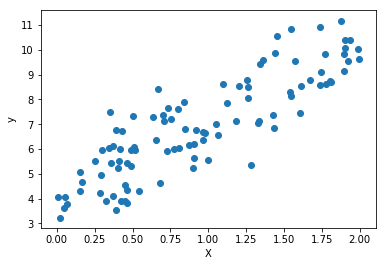

In [3]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")

In [4]:
import sklearn.linear_model as slm

In [5]:
lin_reg = slm.LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
xx = np.linspace(0, 2, 100).reshape(-1, 1)
yy = lin_reg.predict(xx)

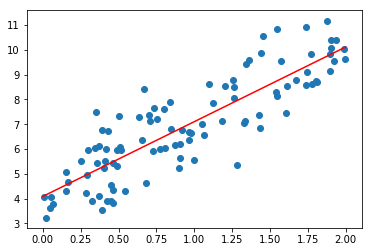

In [7]:
plt.scatter(X, y)
plt.plot(xx, yy, "r")

### Polynomial regression

In [8]:
m = 100
np.random.seed(36)
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) * 0.9

Text(0, 0.5, 'y')

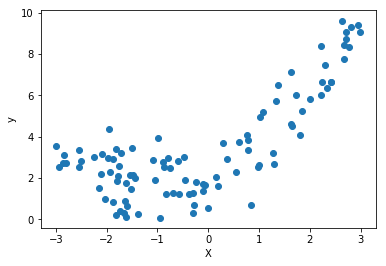

In [9]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X)
print(poly_feat.get_feature_names())
print(X_poly[0:3])
print(X[0:3])

['x0', 'x0^2']
[[1.37104315 1.87975932]
 [0.60968527 0.37171613]
 [2.713084   7.36082482]]
[[1.37104315]
 [0.60968527]
 [2.713084  ]]


In [11]:
print(list(zip(poly_feat.get_feature_names(), X_poly[0])))

[('x0', 1.371043149574354), ('x0^2', 1.8797593179947645)]


In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.coef_, lin_reg.intercept_)

[[1.00643092 0.48808698]] [2.13867156]


In [13]:
xx=np.linspace(-3, 3, 100).reshape(-1, 1)
yy=lin_reg.predict(poly_feat.transform(xx))

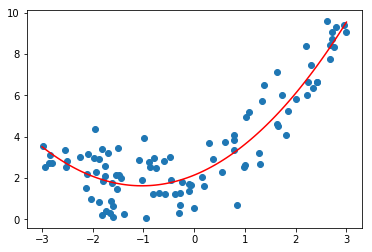

In [14]:
plt.scatter(X, y)
plt.plot(xx, yy, "r")

### Overfitting

In [15]:
poly_feat = PolynomialFeatures(degree=20, include_bias=False)
X_poly = poly_feat.fit_transform(X)

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
xx=np.linspace(-3, 3, 1000).reshape(-1, 1)
yy=lin_reg.predict(poly_feat.transform(xx))

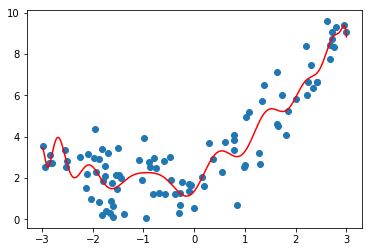

In [18]:
plt.scatter(X, y)
plt.plot(xx, yy, "r")

### Decision trees

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

In [21]:
from sklearn import tree, metrics
model = tree.DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
import graphviz
dot_data = tree.export_graphviz(
    model, out_file=None,
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity = False, filled = True,
    label = 'none')
graph = graphviz.Source(dot_data)
graph.format = 'png'
# graph.render("iris", view=True)

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'iris.png')

In [ ]:
y_pred = model.predict(X_train)
print(metrics.confusion_matrix(y_train, y_pred))

In [ ]:
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))